# Imports

In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
import itertools
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import keras
import math
from sklearn.model_selection import KFold
import sklearn.metrics
from sklearn.model_selection import train_test_split
from operator import itemgetter
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Setting Global Variables

The `segments` dictionary translates the primary behaviors to the overall segemnts

In [48]:
# Number of epochs for neural network training
NUM_EPOCHS = 30
# Sensors for training
sensors = ['Hip', 'Wrist', 'Chest', 'Thigh']
segments = {
    "LES- socializing, communicating, leisure time not screen":"LES",
      "LES- screen based leisure time (TV, video game, computer)":"LES",
      "HA- animals and pets":"HA",
      "HA- housework":"HA",
      "HA- food prep and cleanup":"HA",
      "HA- household management/other household activities":"HA",
      "HA- interior maintenance, repair, & decoration":"HA",
      "HA- lawn, garden and houseplants":"HA",
      "HA- exterior maintenance, repair, & decoration":"HA",
      "CA- caring for and helping adults":"HA",
      "CA- caring for and helping children":"HA",
      "WRK- screen based - Education and Health Services":"WRK",
      "WRK- screen based - Office (business, professional services, finance, info)":"WRK",
      "WRK- general - Education and Health Services":"WRK",
      "WRK- general - Office (business, professional services, finance, info)":"WRK",
      "EDU- taking class, research, homework":"WRK",
      "PC- groom, health-related":"HA",
      "PC- other personal care":"HA",
      "EAT- eating and drinking, waiting":"HA",
      "PUR- purchasing goods and services":"HA",
      "ORG- organizational civic, volunteer, and religious activities":"COM",
      "EX- attending sport, recreational event, or performance":"COM",
      "EX- walking":"EX",
      "EX- jogging":"EX",
      "EX- baseball":"EX",
      "EX- other":"EX",
      "TRAV- walking":"COM",
      "TRAV- passenger bus or train":"COM",
      "TRAV- biking":"COM",
      "TRAV- driver (car/truck/motorcycle)":"COM",
      "OTHER- non codable":"OTHER",
      "None":"OTHER"
}

# Running the Pipeline

These are the blocks that to run the network on

## Hip

Index(['mean.x', 'std.x', 'min.x', 'max.x', 'mean.y', 'std.y', 'min.y',
       'max.y', 'mean.z', 'std.z', 'min.z', 'max.z', 'mean.vm', 'std.vm',
       'pct25.vm', 'pct50.vm', 'pct75.vm', 'mean.ang', 'std.ang', 'mean.xy',
       'mean.xz', 'mean.yz', 'mean.xyz', 'xfft1', 'xfft2', 'xfft3', 'xfft4',
       'xfft5', 'xfft6', 'xfft7', 'xfft8', 'xfft9', 'xfft10', 'xfft11',
       'xfft12', 'xfft13', 'xfft14', 'xfft15', 'yfft1', 'yfft2', 'yfft3',
       'yfft4', 'yfft5', 'yfft6', 'yfft7', 'yfft8', 'yfft9', 'yfft10',
       'yfft11', 'yfft12', 'yfft13', 'yfft14', 'yfft15', 'zfft1', 'zfft2',
       'zfft3', 'zfft4', 'zfft5', 'zfft6', 'zfft7', 'zfft8', 'zfft9', 'zfft10',
       'zfft11', 'zfft12', 'zfft13', 'zfft14', 'zfft15', 'mfft1', 'mfft2',
       'mfft3', 'mfft4', 'mfft5', 'mfft6', 'mfft7', 'mfft8', 'mfft9', 'mfft10',
       'mfft11', 'mfft12', 'mfft13', 'mfft14', 'mfft15'],
      dtype='object')
KFold: 1, loss: 0.474, accuracy: 0.815
34115/34115 [==============================] - 2s 54us

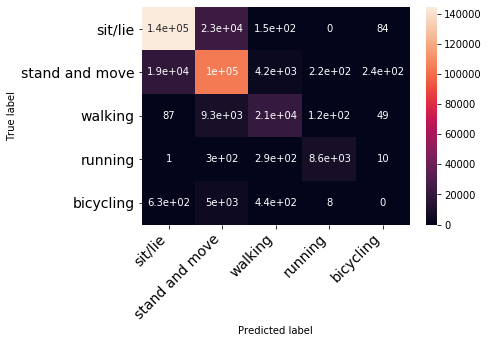

In [56]:
# Run single sensor neural network for detailed activity labels
activity = 'updated_final_activity'
losses = []
accs = []
preds = []
s = "Hip"
# attain dataset for running the model 
data = clean_data(s, activity)

# run the model and output revelant results 
acc, cnf_mat = run_nn(data, "Hip", activity)
print("---------------------------------------------")
print("Accuracy: ",acc)
print(cnf_mat)
print_confusion_matrix(cnf_mat, ['sit/lie', 'stand and move', 'walking', 'running','bicycling'])

## Chest

Index(['mean.x', 'std.x', 'min.x', 'max.x', 'mean.y', 'std.y', 'min.y',
       'max.y', 'mean.z', 'std.z', 'min.z', 'max.z', 'mean.vm', 'std.vm',
       'pct25.vm', 'pct50.vm', 'pct75.vm', 'mean.ang', 'std.ang', 'mean.xy',
       'mean.xz', 'mean.yz', 'mean.xyz', 'xfft1', 'xfft2', 'xfft3', 'xfft4',
       'xfft5', 'xfft6', 'xfft7', 'xfft8', 'xfft9', 'xfft10', 'xfft11',
       'xfft12', 'xfft13', 'xfft14', 'xfft15', 'yfft1', 'yfft2', 'yfft3',
       'yfft4', 'yfft5', 'yfft6', 'yfft7', 'yfft8', 'yfft9', 'yfft10',
       'yfft11', 'yfft12', 'yfft13', 'yfft14', 'yfft15', 'zfft1', 'zfft2',
       'zfft3', 'zfft4', 'zfft5', 'zfft6', 'zfft7', 'zfft8', 'zfft9', 'zfft10',
       'zfft11', 'zfft12', 'zfft13', 'zfft14', 'zfft15', 'mfft1', 'mfft2',
       'mfft3', 'mfft4', 'mfft5', 'mfft6', 'mfft7', 'mfft8', 'mfft9', 'mfft10',
       'mfft11', 'mfft12', 'mfft13', 'mfft14', 'mfft15'],
      dtype='object')
KFold: 1, loss: 0.26, accuracy: 0.903
36218/36218 [==============================] - 2s 54us/

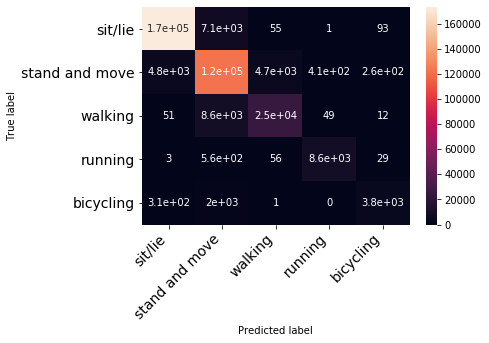

In [57]:
# Run single sensor neural network for detailed activity labels
activity = 'updated_final_activity'
losses = []
accs = []
preds = []
s = "Chest"
data = clean_data(s, activity)
#res = run_nn(data, s, activity)
#sum_cnf_matrix = np.sum(res[2], axis = 0)

acc, cnf_mat = run_nn(data, "Chest", activity)
print("---------------------------------------------")
print("Accuracy: ",acc)
print_confusion_matrix(cnf_mat, ['sit/lie', 'stand and move', 'walking', 'running','bicycling'])

## Wrist

In [61]:
# Run single sensor neural network for detailed activity labels
activity = 'updated_final_activity'
losses = []
accs = []
preds = []
s = "Wrist"
data = clean_data(s, activity)
#res = run_nn(data, s, activity)
#sum_cnf_matrix = np.sum(res[2], axis = 0)
acc, cnf_mat = run_nn(data, "Wrist", activity)
print("---------------------------------------------")
print("Accuracy: ",acc)
print_confusion_matrix(cnf_mat, ['sit/lie', 'stand and move', 'walking', 'running','bicycling'])

#pred = pd.DataFrame(pred)

#pred.to_csv(''+s+'_predictions.csv')

#df = pd.DataFrame({'pred':preds})
#sensor = "Hip"
#df.to_csv(sensor+'_'+'predictions.csv')

KeyboardInterrupt: 

## Thigh 

In [ ]:
# Run single sensor neural network for detailed activity labels
activity = 'updated_final_activity'
losses = []
accs = []
preds = []
s = "Thigh"
data = clean_data(s, activity)
#res = run_nn(data, s, activity)
#sum_cnf_matrix = np.sum(res[2], axis = 0)
acc, cnf_mat = run_nn(data, "Thigh", activity)
print("---------------------------------------------")
print("Accuracy: ",acc)
print_confusion_matrix(cnf_mat, ['sit/lie', 'stand and move', 'walking', 'running','bicycling'])

#pred = pd.DataFrame(pred)

#pred.to_csv(''+s+'_predictions.csv')

#df = pd.DataFrame({'pred':preds})
#sensor = "Hip"
#df.to_csv(sensor+'_'+'predictions.csv')

In [43]:
test_matrix = sklearn.metrics.precision_recall_fscore_support([1,1,0,1,0,1,1],[0,1,0,0,0,1,1])

In [44]:
test_matrix

(array([0.5, 1. ]),
 array([1. , 0.6]),
 array([0.66666667, 0.75      ]),
 array([2, 5]))

# Functions

- `clean_data` deals with importing the dataset and computing the segemnts
- `run_nn` prepares some features and runs the neural network
    - `run_kfold` is called within this function, it runs the stratified cross-validation and computes the averaged MSE and other metrics
- `get_model_1layer_updated` is an example of the place to put any varying modeling architecture, to change the model just make a new function and edit the line in `run_kfold` that goes `model = get_model_1layer_updated()` with your new model

In [12]:
def clean_data(sensor, activity):
    data = pd.read_csv('../../mnt/storage/Datasets/final_data/'+sensor + ".csv", low_memory = False)
    # Take out unnamed columns
    data.drop([col for col in data.columns if "Unnamed" in col], axis=1, inplace = True)
    # Drop un-encoded data
    data = data[data[activity] != 'private/not coded']
    return data

In [17]:
def run_nn(data, sensor, activity):
    x_cols = data.columns[18:(82 + 19)]
    print(x_cols)
    y = data[activity]
    # Standardize x columns
    X = data[x_cols].apply(lambda x: (x - np.mean(x)) / np.std(x))
    X = X.fillna(X.mean()).values
    # One hot vectorize categories
    Y = pd.get_dummies(y).values
    dummy_labels = pd.get_dummies(y).columns.tolist()
    # Run k-fold cross validation
    res = run_kfold(X, Y, 10, sensor, activity, dummy_labels)
    
    # Save confusion matrix visualizations
    #conf_mat(res, sensor, activity, dummy_labels)
    # Calculate precision/recall metrics, save results
    #prec_recall(res, sensor, activity, dummy_labels)
    return res

In [63]:
def run_kfold(X, Y, splits, sensor, activity, class_labels):
    kf = KFold(n_splits=splits)
    i = 1
    acc_sum = 0
    loss_sum = 0
    prec = []
    cnf_tables = []
    cnf_total = np.zeros((5,5))
    f1_rep = []
    prec_rep = []
    rec_rep = []
    i = 1
    model = None
    
    for train_index, test_index, in kf.split(X):

        # Reset model and get new one
        model = get_model_1layer_updated()

        # Split data into train and test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        model.fit(X_train, y_train,batch_size=128, epochs= NUM_EPOCHS,
                  verbose = False)
        
        # Confusion matrix calculations
        
        # Get model predictions, save as list
        y_pred = np.argmax(model.predict(X_test, verbose = 1), axis = 1)
        y_pred = [class_labels[x] for x in y_pred.tolist()]
        
        # post-process if necessary
        if post_process:
            y_pred = post_process(y_pred)
        
        # Get ground truth
        y_true = np.argmax(y_test, axis = 1)
        y_true = [class_labels[x] for x in y_true.tolist()]
        
        # Evaluate accuracy of model
        acc = sklearn.metrics.accuracy_score(y_true,y_pred)
    
        acc_sum = acc_sum + acc
        i += 1

        # Make confusion matrix
        cnf_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred,
            labels=['sit/lie', 'stand and move', 'walking', 'running',
               'bicycling'])

        # Add confusion matrix for this fold to list
        cnf_tables.append(cnf_matrix)
        
        # Add to total confusion matrix
        cnf_total += cnf_matrix
        
        class_report = sklearn.metrics.precision_recall_fscore_support(y_true, y_pred, 
            labels = ['sit/lie', 'stand and move', 'walking', 'running','bicycling'])
        
        # get f1 for this fold 
        f1_rep.append(class_report[2:4])
        
        # get precision for this fold
        prec_rep.append(itemgetter(0,3)(class_report))
        
        # get recall for this fold
        rec_rep.append(itemgetter(1,3)(class_report))
                                                      
    # Save last trained model to disk
    #save_model(sensor, activity, model)
    
    # Get average loss and accuracy for all kfolds
    acc_r = round(acc_sum / splits, 3)
    
    # print out weighted average f1-score
    actual_f1 = {'sit/lie':0, 'stand and move':0,'walking':0,'running':0,'bicycling':0}
    total_f1 = {'sit/lie':0,'stand and move':0, 'walking':0,'running':0,'bicycling':0}
    

    for f1 in f1_rep:
        actual_f1['sit/lie'] += f1[0][0] * f1[1][0]
        actual_f1['stand and move'] += f1[0][1] * f1[1][1]
        actual_f1["walking"] += f1[0][2] * f1[1][2]
        actual_f1["running"] += f1[0][3] * f1[1][3]
        actual_f1["bicycling"] += f1[0][4] * f1[1][4]
        total_f1['sit/lie'] += f1[1][0]
        total_f1['stand and move'] += f1[1][1]
        total_f1["walking"] += f1[1][2]
        total_f1["running"] += f1[1][3]
        total_f1["bicycling"] += f1[1][4]
        
    for k in list(actual_f1.keys()):
        print("F1 ",k,":",actual_f1[k]/total_f1[k])
    
    # print out precision stats
    actual_prec = {'sit/lie':0, 'stand and move':0,'walking':0,'running':0,'bicycling':0}
    total_prec = {'sit/lie':0, 'stand and move':0,'walking':0,'running':0,'bicycling':0}
    
    for prec in prec_rep:
        actual_prec['sit/lie'] += prec[0][0] * prec[1][0]
        actual_prec['stand and move'] += prec[0][1] * prec[1][1]
        actual_prec["walking"] += prec[0][2] * prec[1][2]
        actual_prec["running"] += prec[0][3] * prec[1][3]
        actual_prec["bicycling"] += prec[0][4] * prec[1][4]
        total_prec['sit/lie'] += prec[1][0]
        total_prec['stand and move'] += prec[1][1]
        total_prec["walking"] += prec[1][2]
        total_prec["running"] += prec[1][3]
        total_prec["bicycling"] += prec[1][4]
        
    for k in list(actual_prec.keys()):
        print("Precision ",k,":",actual_prec[k]/total_prec[k])
    
    # print out recall stats
    actual_re = {'sit/lie':0, 'stand and move':0,'walking':0,'running':0,'bicycling':0}
    total_re = {'sit/lie':0, 'stand and move':0,'walking':0,'running':0,'bicycling':0}
    
    for rec in rec_rep:
        actual_re['sit/lie'] += rec[0][0] * rec[1][0]
        actual_re['stand and move'] += rec[0][1] * rec[1][1]
        actual_re["walking"] += rec[0][2] * rec[1][2]
        actual_re["running"] += rec[0][3] * rec[1][3]
        actual_re["bicycling"] += rec[0][4] * rec[1][4]
        total_re['sit/lie'] += rec[1][0]
        total_re['stand and move'] += rec[1][1]
        total_re["walking"] += rec[1][2]
        total_re["running"] += rec[1][3]
        total_re["bicycling"] += rec[1][4]
        
    for k in list(actual_re.keys()):
        print("Recall ",k,":",actual_re[k]/total_re[k])
    
    return acc_r, cnf_total

In [51]:
def get_model_1layer_updated():
    # Neural Network Architecture for single sensor
    model = tf.keras.Sequential([
            layers.Dense(83, activation="relu", input_shape = (83,)),
            layers.Dense(64, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(8, activation="relu"),
            layers.Dense(5, activation = 'softmax')])
    model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [52]:
# changed 18: for cols
# changed get_model first layer as 82 from 83
# this first column was a time???

In [53]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    #fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
def post_process(prediction):   
    """
    basic post processing...
    prediction: array of predicted values from the NN
    """
    #preds = prediction['predicted_values']
    preds_new = preds.copy()


    for i in range(2, len(preds)-2):
#         size = mode_size*2 +1
#         points = [None]* size
#         for j in range(size):
#             print(j)
#             print(points)
#             points[j] = preds.iloc[i - mode_size]
#             mode_size +=1
        points = [preds[i-2],preds[i-1], preds[i], preds[i+1], preds[i+2]]
        preds_new[i] = stats.mode(points)[0][0]

    #preds_new = pd.DataFrame(preds_new)
    #preds_new.columns = ['post_predictions']
    #final_preds = pd.concat([prediction,preds_new],axis =1)

    #errors_1 = final_preds['y_true'] == final_preds['predicted_values']
    #errors_2 = final_preds['y_true'] == final_preds['post_predictions']

    #print('predicted_value errors',np.sum(errors_1)/len(errors_1))

    #print('post_processed errors',np.sum(errors_2)/len(errors_2))
    
    #print('Accuracy improvement:', (np.sum(errors_2)/len(errors_2)-np.sum(errors_1)/len(errors_1)))
    return preds_new